# Description
The Census Income dataset has 48,842 entries. Each entry contains the following information
about an individual:

● age: the age of an individual
○ Integer greater than 0

● workclass: a general term to represent the employment status of an individual
○ Private, Self­emp­not­inc, Self­emp­inc, Federal­gov, Local­gov, State­gov,
Without­pay, Never­worked.

● fnlwgt: final weight. In other words, this is the number of people the census believes
the entry represents..
○ Integer greater than 0

● education: the highest level of education achieved by an individual.
○ Bachelors, Some­college, 11th, HS­grad, Prof­school, Assoc­acdm, Assoc­voc,
9th, 7th­8th, 12th, Masters, 1st­4th, 10th, Doctorate, 5th­6th, Preschool.

● education­num: the highest level of education achieved in numerical form.
○ Integer greater than 0

● marital­status: marital status of an individual. Married­civ­spouse corresponds to a
civilian spouse while Married­AF­spouse is a spouse in the Armed Forces.
○ Married­civ­spouse, Divorced, Never­married, Separated, Widowed,
Married­spouse­absent, Married­AF­spouse.

● occupation: the general type of occupation of an individual
○ Tech­support, Craft­repair, Other­service, Sales, Exec­managerial,
Prof­specialty, Handlers­cleaners, Machine­op­inspct, Adm­clerical,
Farming­fishing, Transport­moving, Priv­house­serv, Protective­serv,
Armed­Forces.

● relationship: represents what this individual is relative to others. For example an
individual could be a Husband. Each entry only has one relationship attribute and is
somewhat redundant with marital status. We might not make use of this attribute at all
○ Wife, Own­child, Husband, Not­in­family, Other­relative, Unmarried.

● race: Descriptions of an individual’s race
○ White, Asian­Pac­Islander, Amer­Indian­Eskimo, Other, Black.

● sex: the biological sex of the individual
○ Male, Female

● capital­gain: capital gains for an individual
○ Integer greater than or equal to 0

● capital­loss: capital loss for an individual
○ Integer greater than or equal to 0

● hours­per­week: the hours an individual has reported to work per week
○ continuous.

● native­country: country of origin for an individual
○ United­States, Cambodia, England, Puerto­Rico, Canada, Germany,
Outlying­US(Guam­USVI­etc), India, Japan, Greece, South, China, Cuba, Iran,
Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal,
Ireland, France, Dominican­Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,
Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El­Salvador,
Trinadad&Tobago, Peru, Hong, Holand­Netherlands.

● the label: whether or not an individual makes more than $50,000 annually.
○ <=50k, >50k


In [1]:
#import dependencies
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#import pydotplus
#from IPython.display import Image

In [2]:
#import dataset
adult_df= pd.read_csv(r"D:\Python files\Python Codes\Decision trees\Dataset\adult.csv", index_col=False)

# Exploring data

In [3]:
#View dataset
print(adult_df.shape)
print(adult_df.dtypes)
adult_df.head()

(48842, 15)
Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education num      int64
Marital status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital gain       int64
Capital loss       int64
Hours per week     int64
Native country    object
Class             object
dtype: object


,Age,Workclass,Fnlwgt,Education,Education num,Marital status,Occupation,Relationship,Race,Sex,Capital gain,Capital loss,Hours per week,Native country,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#Check if there are any missing values
adult_df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education num     0
Marital status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital gain      0
Capital loss      0
Hours per week    0
Native country    0
Class             0
dtype: int64

In [5]:
#check what are the unique values across categorical columns by running a loop
for col in adult_df.columns[3:10]:
    print(col,"- ",adult_df[col].unique())
    print("\n")
print("Workclass- ",adult_df["Workclass"].unique())
print("\n","Native country- ",adult_df["Native country"].unique())
print("\n","Class- ",adult_df["Class"].unique())

Education -  [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


Education num -  [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


Marital status -  [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


Occupation -  [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


Relationship -  [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']


Race -  [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']


Sex -  [' Male' ' Female']


Workclass-  [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-em

In [6]:
#To check number of invalid values (" ?") across columns - Occupation, Workclass and Native country.

index=np.where(adult_df['Occupation']==' ?') #stores indexes satisfying this condition as tuples
print("Occupation - ",len(adult_df.iloc[index]))

index=np.where(adult_df['Workclass']==' ?')
print("Workclass - ",len(adult_df.iloc[index]))

index=np.where(adult_df['Native country']==' ?')
print("Native country - ",len(adult_df.iloc[index]))


Occupation -  2809
Workclass -  2799
Native country -  857


index= np.where(adult_df['Occupation']==' ?') and np.where(adult_df['Workclass']==' ?')
print("Rows in which both Workclass and occupation have invalid values - ",len(adult_df.iloc[index]))

index= np.where(adult_df['Native country']==' ?') and np.where(adult_df['Occupation']==' ?')
print("Rows in which both Native country and occupation have invalid values - ",len(adult_df.iloc[index]))


In [7]:
adult_df['Occupation']=adult_df['Occupation'].replace(" ?",np.nan)
adult_df['Workclass']=adult_df['Workclass'].replace(" ?",np.nan)
adult_df['Native country']=adult_df['Native country'].replace(" ?",np.nan)

#To check if all " ?" have dropped
index=np.where(adult_df['Occupation']==' ?') #stores indexes satisfying this condition as tuples
print("Occupation - ",len(adult_df.iloc[index]))

index=np.where(adult_df['Workclass']==' ?')
print("Workclass - ",len(adult_df.iloc[index]))

index=np.where(adult_df['Native country']==' ?')
print("Native country - ",len(adult_df.iloc[index]))


Occupation -  0
Workclass -  0
Native country -  0


In [8]:
#Removing invalid values
adult_df=adult_df.dropna(subset= ['Occupation','Workclass','Native country'], axis=0)
print(adult_df.dtypes)
print("Shape - ",adult_df.shape)

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education num      int64
Marital status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital gain       int64
Capital loss       int64
Hours per week     int64
Native country    object
Class             object
dtype: object
Shape -  (45222, 15)


# Checking outliers (if any)

In [9]:
#To get a sense of numerical data
adult_df.describe().round(2)

,Age,Fnlwgt,Education num,Capital gain,Capital loss,Hours per week
count,45222.00,45222.00,45222.00,45222.00,45222.00,45222.00
mean,38.55,189734.73,10.12,1101.43,88.60,40.94
std,13.22,105639.20,2.55,7506.43,404.96,12.01
min,17.00,13492.00,1.00,0.00,0.00,1.00
25%,28.00,117388.25,9.00,0.00,0.00,40.00
50%,37.00,178316.00,10.00,0.00,0.00,40.00
75%,47.00,237926.00,13.00,0.00,0.00,45.00
max,90.00,1490400.00,16.00,99999.00,4356.00,99.00


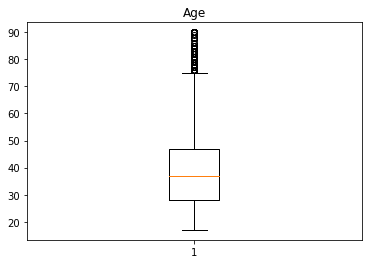

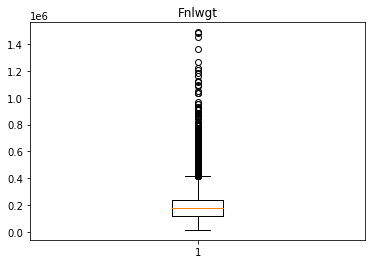

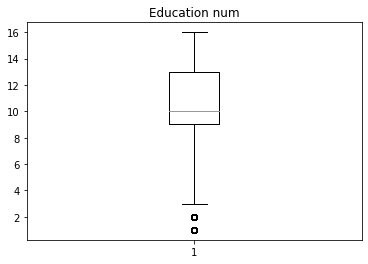

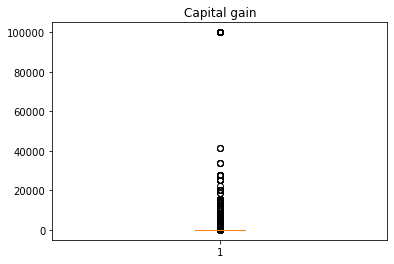

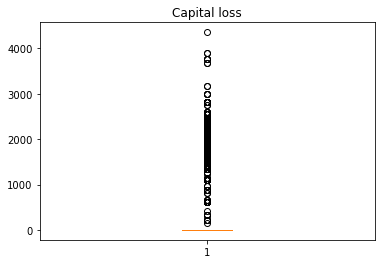

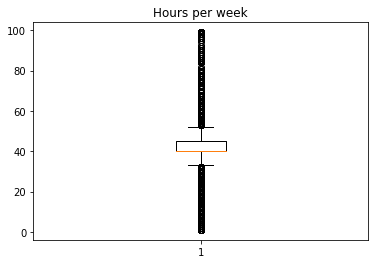

In [10]:
# Visualizing outliers
new_df=adult_df[["Age","Fnlwgt","Education num","Capital gain","Capital loss","Hours per week"]].copy()

for col in new_df.columns:
    plt.boxplot(new_df[col])
    plt.title(col)
    plt.show()

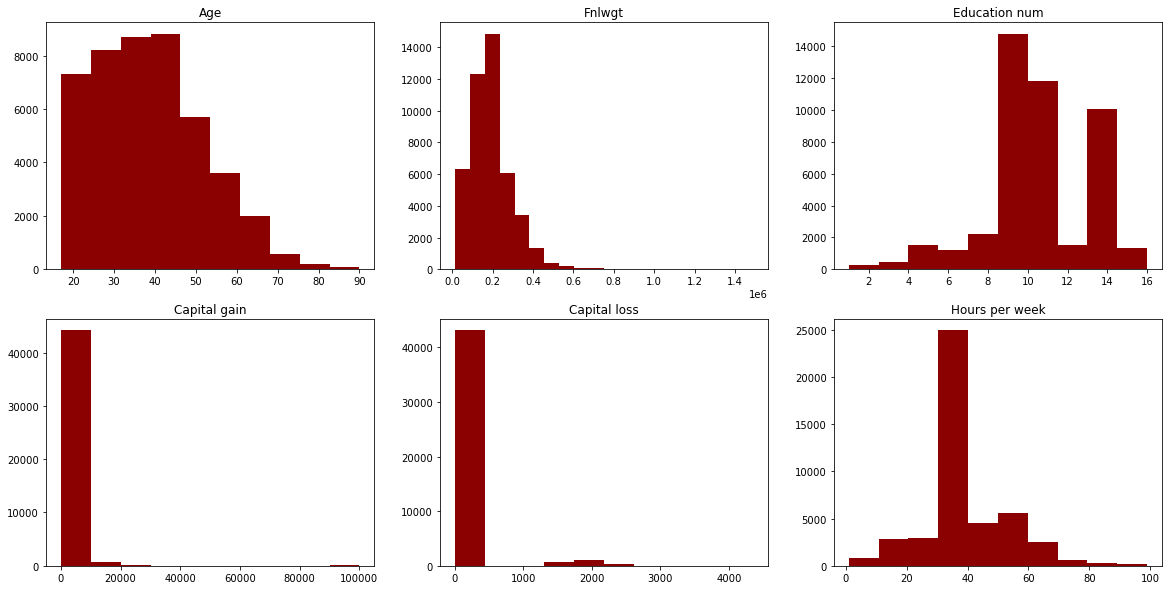

In [11]:
# note: (131) means 1 row 3 columns and place it as first graph, it can be (234) also 
#xticks shows interval to be takes for X
plt.figure(figsize=(20,10))

plt.subplot(231)
plt.hist(x="Age",data=adult_df, bins=10,color='darkred')
plt.title('Age')

plt.subplot(232)
plt.hist(x="Fnlwgt",data=adult_df, bins=20,color='darkred')
plt.title('Fnlwgt')

plt.subplot(233)
plt.hist(x="Education num",data=adult_df, bins=10,color='darkred')
plt.title('Education num')

plt.subplot(234)
plt.hist(x="Capital gain",data=adult_df, bins=10, color='darkred')
plt.title('Capital gain')

plt.subplot(235)
plt.hist(x="Capital loss", data= adult_df, bins=10, color='darkred')
plt.title('Capital loss')

plt.subplot(236)
plt.hist(x="Hours per week", data=adult_df, bins=10, color='darkred')
plt.title('Hours per week')

plt.show()

Checking Correlation between numeric variables

In [12]:
#Finding Correlation
correlation_matrix = adult_df.iloc[:,:].corr().round(2)
correlation_matrix

,Age,Fnlwgt,Education num,Capital gain,Capital loss,Hours per week
Age,1.00,-0.08,0.04,0.08,0.06,0.10
Fnlwgt,-0.08,1.00,-0.04,-0.00,-0.00,-0.02
Education num,0.04,-0.04,1.00,0.13,0.08,0.15
Capital gain,0.08,-0.00,0.13,1.00,-0.03,0.08
Capital loss,0.06,-0.00,0.08,-0.03,1.00,0.05
Hours per week,0.10,-0.02,0.15,0.08,0.05,1.00


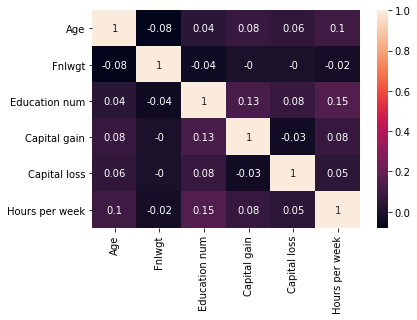

In [13]:
sns.heatmap(data=correlation_matrix, annot=True) #This shows there is no correlation between any num variables

Removing Outlier

In [14]:
#Based on the above visualizations looks like only Fnlwght may have outlier.
#So we will remove that one entry and compare the results with the model without removing the outlier.
#check top 5% of data in Fnlwgt
#threshold= adult_df["Fnlwgt"].quantile([0.95], interpolation='midpoint')
#Q1, threshold= np.percentile(adult_df["Fnlwgt"],[5,95])
#adult_df.drop(adult_df[(adult_df.Fnlwgt > threshold)].index,inplace=True)

In [15]:
#We will make a model in which we will check if only the numerical variables are able to make good predictions

In [16]:
#Splitting data into X and Y
Y= adult_df['Class']
X= adult_df[["Age","Fnlwgt","Education num","Capital gain","Capital loss","Hours per week"]]

In [17]:
#Further splitting data into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=10)

In [18]:
#Logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(solver='liblinear', random_state=10)
model.fit(X, Y)
Y_predict=model.predict(X_test)

#from sklearn import metrics
from sklearn.metrics import accuracy_score

print("Accuracy_score = ",accuracy_score(Y_test, Y_predict, normalize=True, sample_weight=None))

Accuracy_score =  0.8070935786308155


In [19]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, Y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

C:\Users\Koustubh-Pranjali\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Koustubh-Pranjali\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.0762 ± 0.0041,Capital gain
0.0309 ± 0.0016,Capital loss
